In [1]:
import torch
import glob
import numpy as np
import pandas as pd
from torch import nn, optim
from torch.nn import functional as F
import time 
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
main_folder = '..//data//torch test//'
main_folder_raw = '..//data//raw test//'

In [4]:
winLen = 35000

In [5]:
def data_loader(path):  
    print('Working on: ', path)
    allFiles = glob.glob(path + "/*.csv")
    fileNum = 0
    dataTorch = []
    for file_ in allFiles:
        # print(file_)
        singleFile = torch.from_numpy(pd.read_csv(file_, index_col=0, header=None)
                                      .reset_index().values).view(-1,1,winLen)
        dataTorch.append(singleFile) 
        fileNum += 1
        print('File number: ', fileNum, ' out of', len(allFiles), 'finished', 'shape :', singleFile.shape)
    return dataTorch

In [6]:
def load_plot_save(path):
    data = data_loader(path)
    for i in range(len(data)):
        print("Shape of the data {} : ".format(i))
        print(data[i].shape)

    data_cat = torch.cat(data, 0)
    print('Data_cat: ', data_cat.shape)
    
    torch.save(data_cat, main_folder+path.split('\\')[-2])

In [7]:
allFiles = glob.glob(main_folder_raw + "/*/")
allFiles

['..//data//raw test\\dry_test_new\\',
 '..//data//raw test\\semi_test_new\\',
 '..//data//raw test\\wet_test_new\\']

In [8]:
for file in allFiles:
    load_plot_save(file)
    print('----'*10)

Working on:  ..//data//raw test\dry_test_new\
File number:  1  out of 1 finished shape : torch.Size([52, 1, 35000])
Shape of the data 0 : 
torch.Size([52, 1, 35000])
Data_cat:  torch.Size([52, 1, 35000])
----------------------------------------
Working on:  ..//data//raw test\semi_test_new\
File number:  1  out of 2 finished shape : torch.Size([51, 1, 35000])
File number:  2  out of 2 finished shape : torch.Size([51, 1, 35000])
Shape of the data 0 : 
torch.Size([51, 1, 35000])
Shape of the data 1 : 
torch.Size([51, 1, 35000])
Data_cat:  torch.Size([102, 1, 35000])
----------------------------------------
Working on:  ..//data//raw test\wet_test_new\
File number:  1  out of 2 finished shape : torch.Size([51, 1, 35000])
File number:  2  out of 2 finished shape : torch.Size([51, 1, 35000])
Shape of the data 0 : 
torch.Size([51, 1, 35000])
Shape of the data 1 : 
torch.Size([51, 1, 35000])
Data_cat:  torch.Size([102, 1, 35000])
----------------------------------------


In [9]:
def plot_mean(file):
    data_final = torch.load(file)
    print("Data shape: ", data_final.shape)
    ending_wind = data_final.narrow(2,32000, 3000)
    mean_wind = torch.mean(ending_wind.float(), 2).view(-1)
    plt.figure()
    plt.plot(mean_wind)
    plt.title(file)

In [10]:
def plot_windows(file, index):
    data_final = torch.load(file)
    print("Data shape: ", data_final.shape)
    plt.figure()
    for i in range(10):
        plt.plot(data_final.narrow(0,index+i,1).view(-1), label='Window {}'.format(index+i))
    plt.legend()
    plt.title(file)

In [11]:
allFiles = glob.glob(main_folder + "/*")
allFiles

['..//data//torch test\\dry_test_new',
 '..//data//torch test\\semi_test_new',
 '..//data//torch test\\wet_test_new']

Data shape:  torch.Size([52, 1, 35000])


<IPython.core.display.Javascript object>


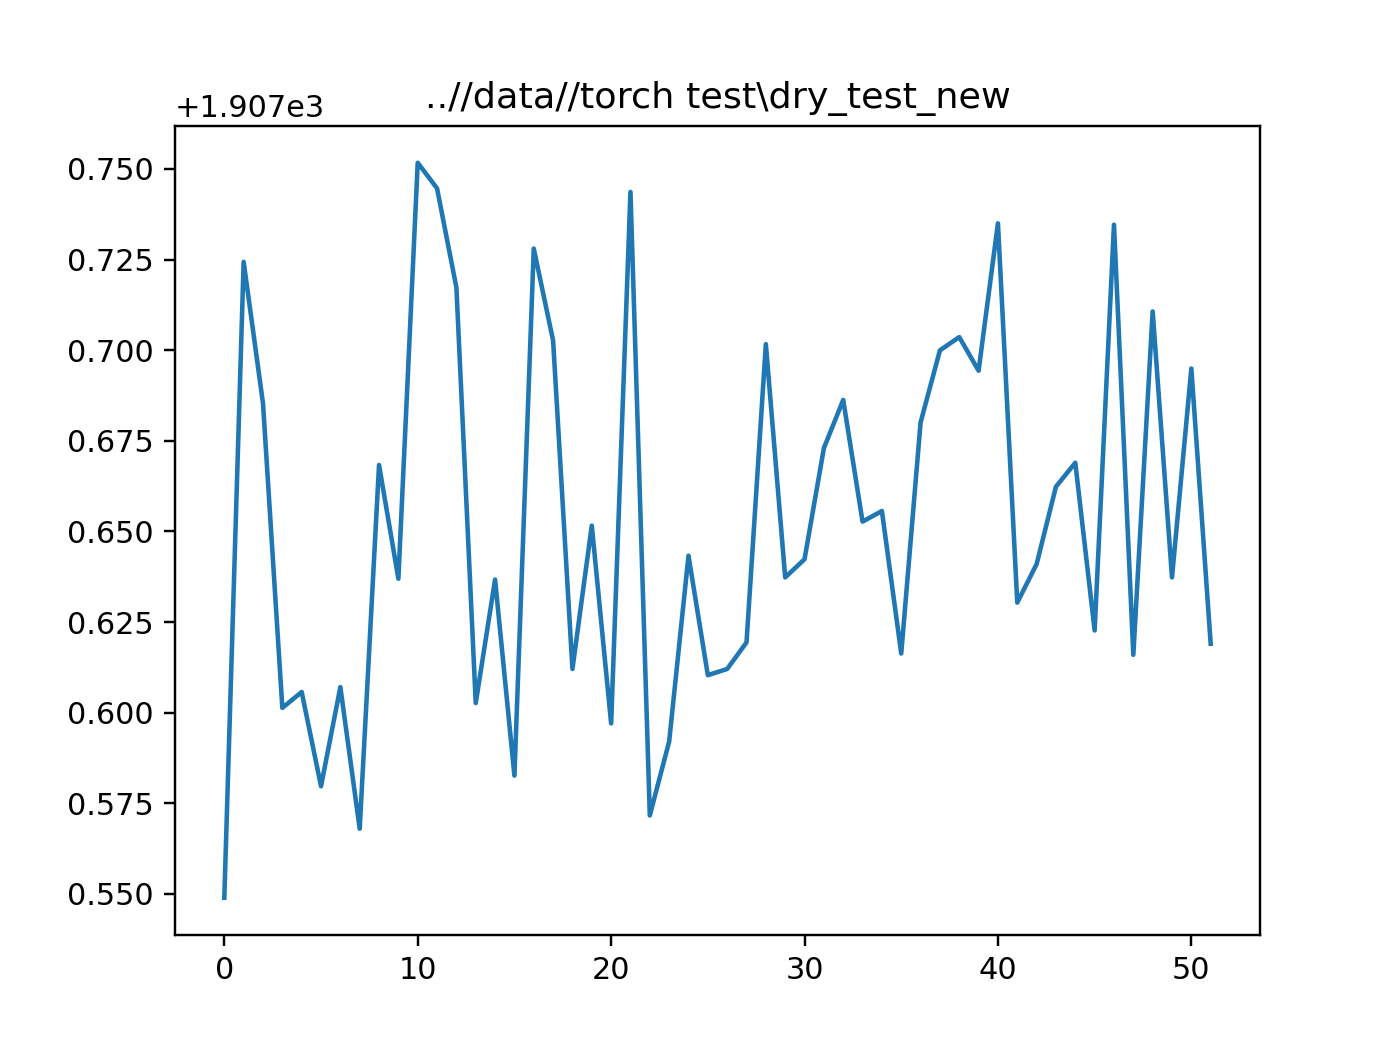

Data shape:  torch.Size([52, 1, 35000])


<IPython.core.display.Javascript object>


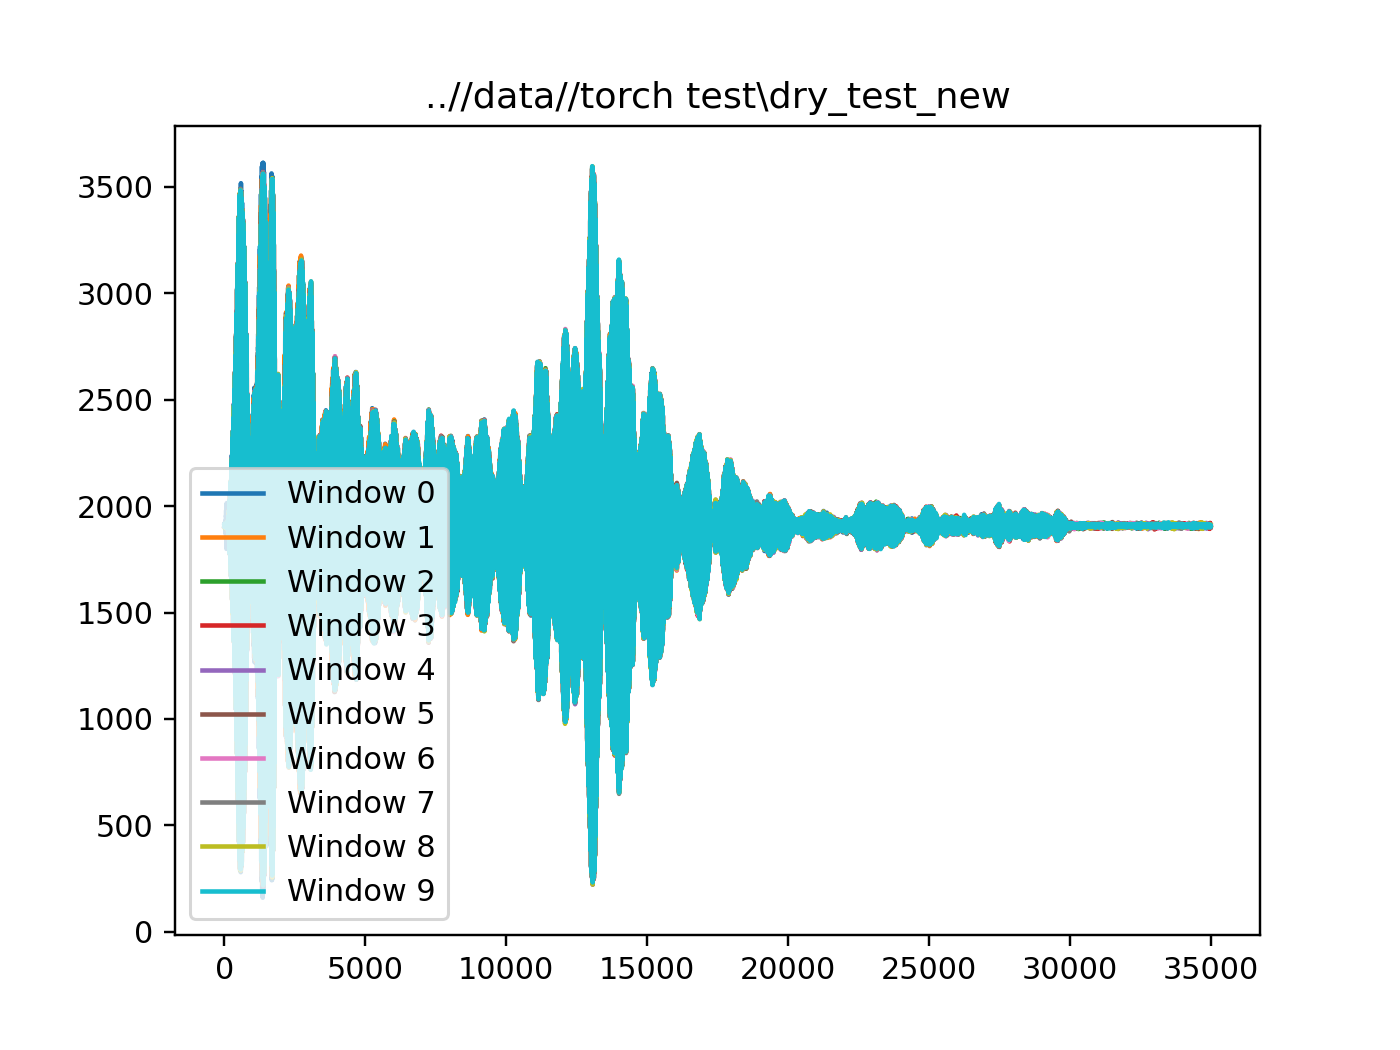

Data shape:  torch.Size([102, 1, 35000])


<IPython.core.display.Javascript object>


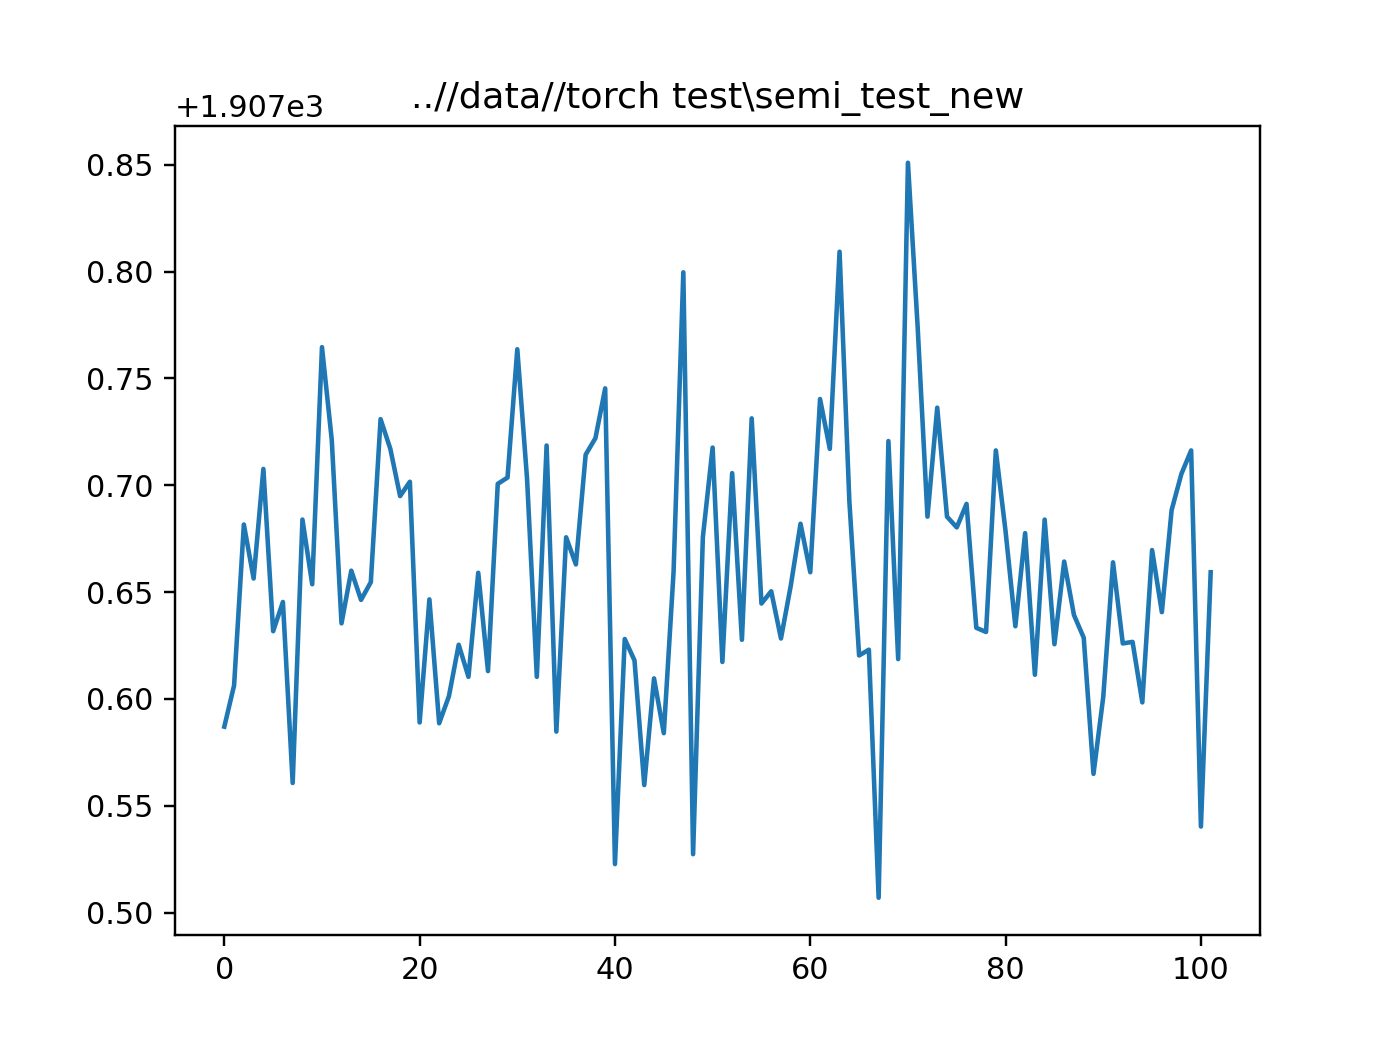

Data shape:  torch.Size([102, 1, 35000])


<IPython.core.display.Javascript object>


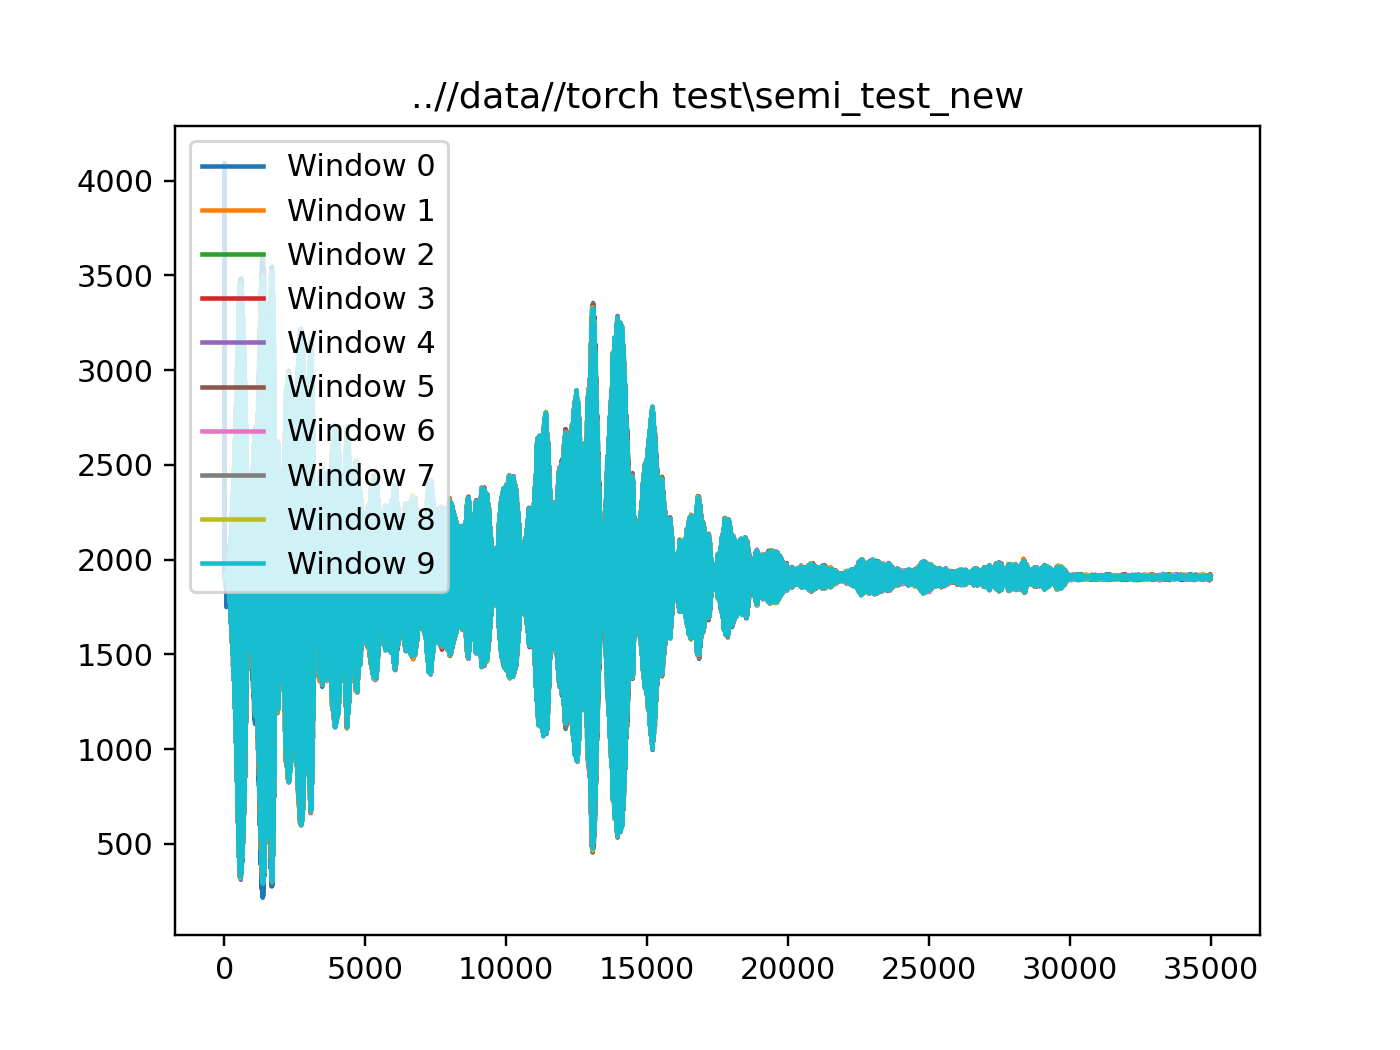

Data shape:  torch.Size([102, 1, 35000])


<IPython.core.display.Javascript object>


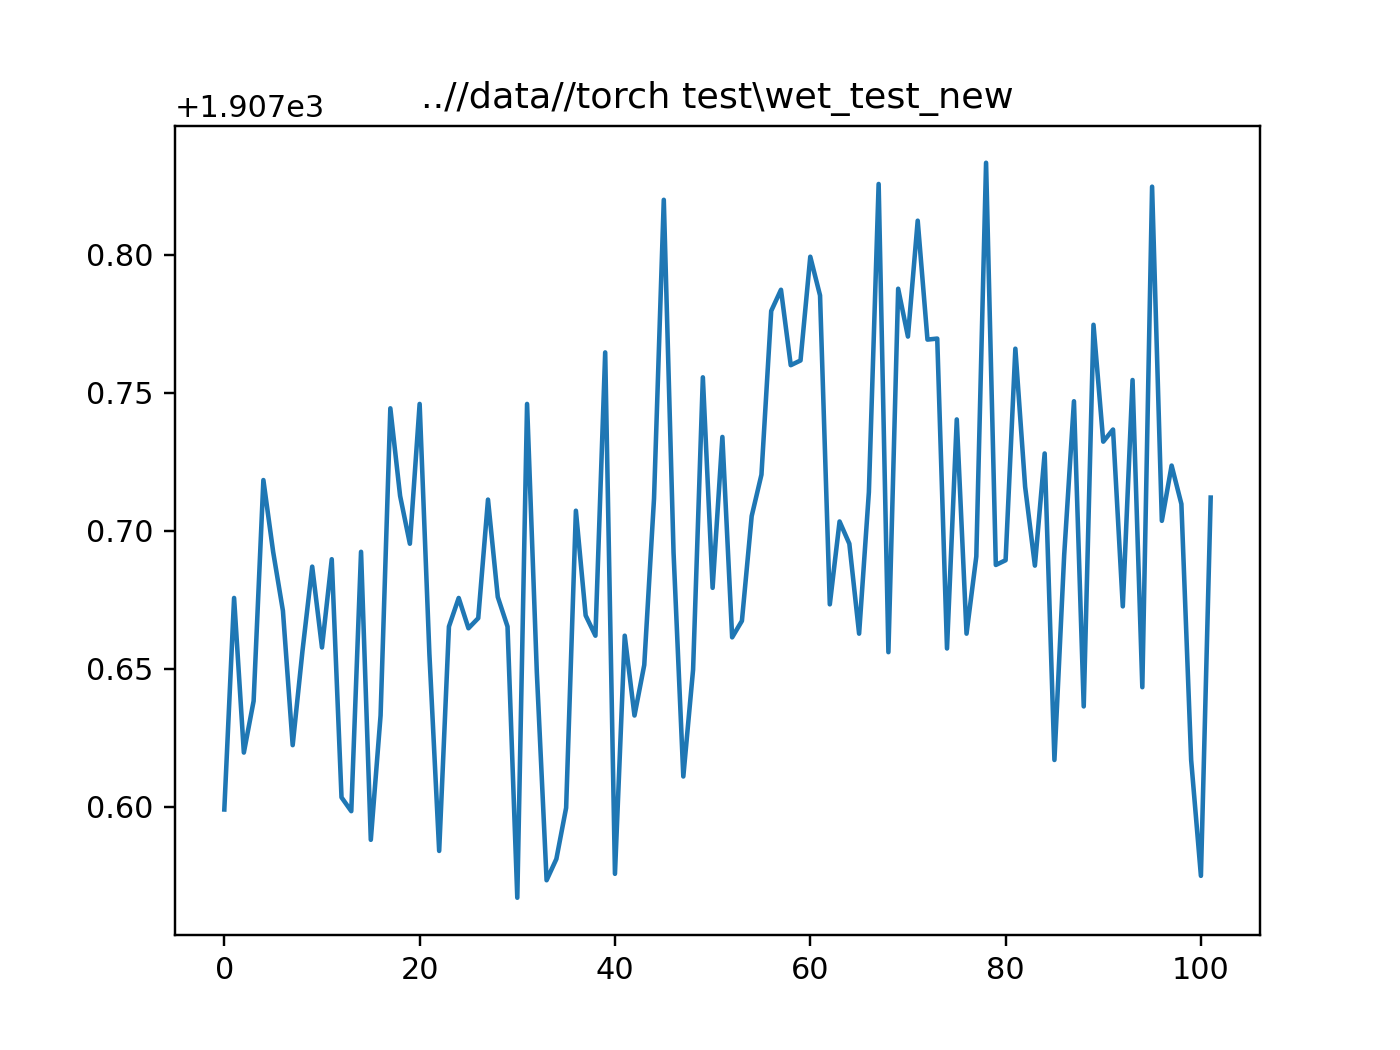

Data shape:  torch.Size([102, 1, 35000])


<IPython.core.display.Javascript object>


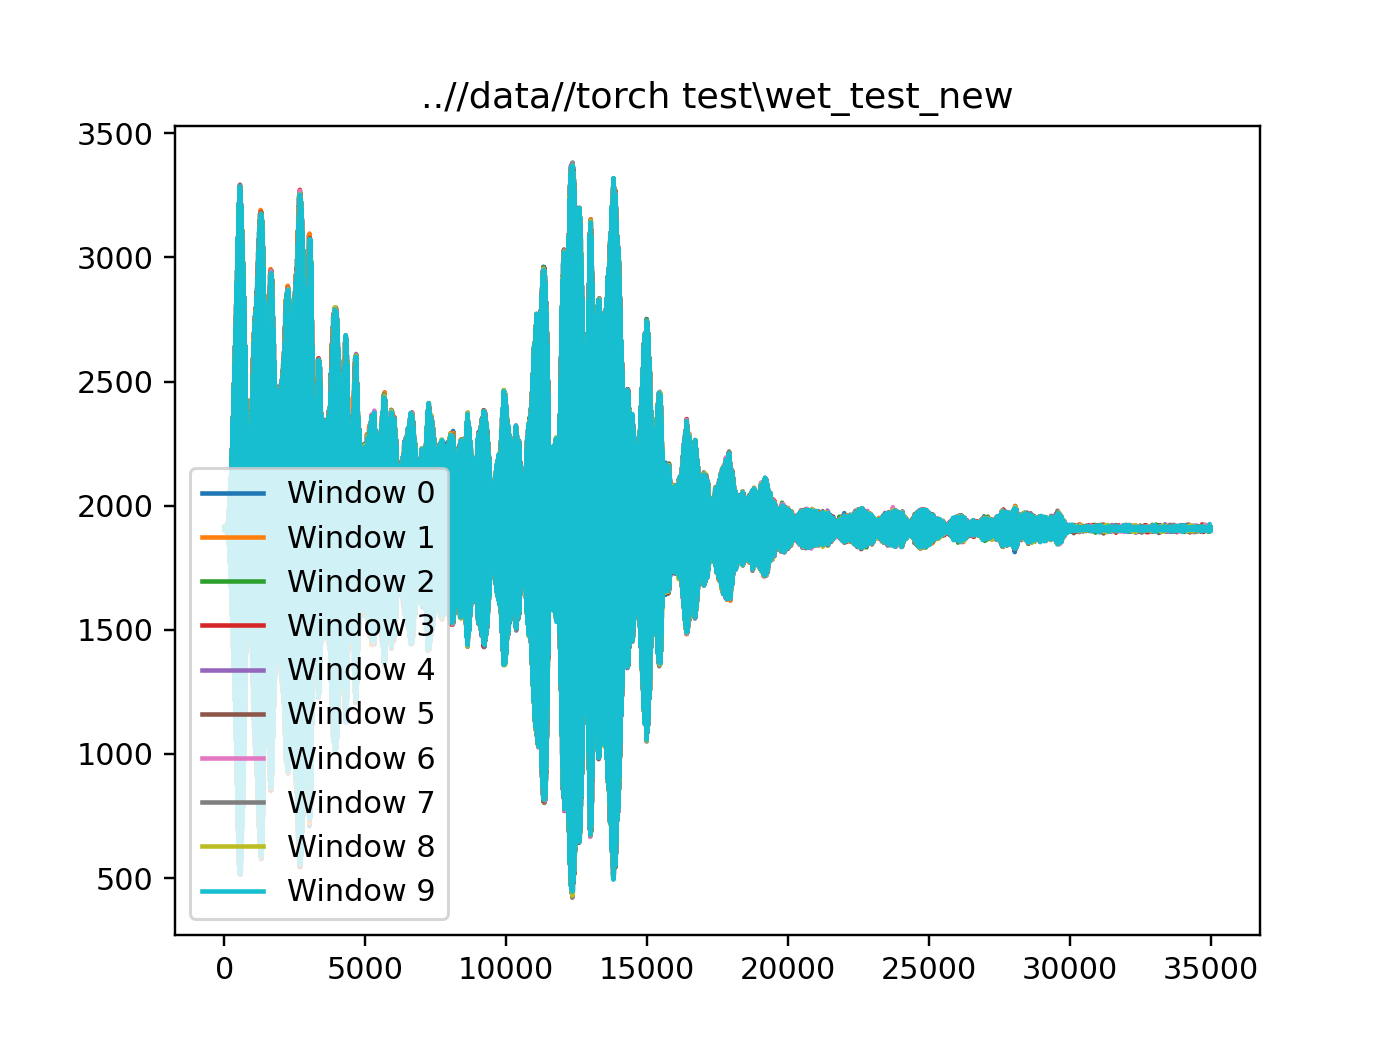

In [12]:
for file in allFiles:
    plot_mean(file)
    plot_windows(file, index=0)